In [181]:
import numpy as np
import gym
import torch
from torch.autograd import Variable
import time
import matplotlib.pyplot as plt

In [182]:
# Create gym environment
env = gym.make('Pendulum-v0')
env.reset()

array([ 0.98261175, -0.18567215, -0.15130556])

In [183]:
# Neural network model for transition dynamics
# Learns regression from state and action to resulting state and reward
class ControlNet(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ControlNet, self).__init__()
        self.input_linear = torch.nn.Linear(input_dim, hidden_dim)
        self.middle_linear = torch.nn.Linear(hidden_dim, hidden_dim)
        self.output_linear = torch.nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        # Coppied, replace with own code or understand
        # Link: https://pytorch.org/tutorials/beginner/examples_nn/dynamic_net.html
        h_relu = self.input_linear(x).clamp(min=0)
        for _ in range(np.random.randint(0, 3)):
            h_relu = self.middle_linear(h_relu).clamp(min=0)
        output_pred = self.output_linear(h_relu)
        return output_pred

In [184]:
# Batch size, input dimension, hidden dimension, output dimension
n, d_in, d_hid, d_out = 1, 4, 16, 4
# Create tensors to hold inputs and outputs
# Initialized randomly
net_input = torch.randn(n, d_in)
net_output = torch.randn(n, d_out)
true_output = torch.randn(n, d_out) 
# Instance of nn model
model = ControlNet(d_in, d_hid, d_out).double()
# Criterion for optimisation: Mean Squared Loss
criterion = torch.nn.MSELoss(reduction='sum') # reduction sum???
# Learning rate for nn
l_rate = 0.01
# Optimizer: Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=l_rate, momentum=0.9)
# Learning episodes
epochs = 100

In [185]:
# Policy: Random action
def policy(s):
    a = env.action_space.sample()
    return a

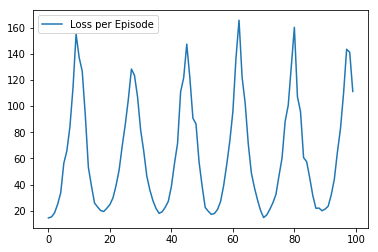

In [186]:
# Training the model
state = env.reset()
loss_per_episode = []

for epoch in range(epochs):
    # Increase epoch counter
    epoch += 1
    # Render gym environment
    # env.render()
    # Select action according to policy
    action = policy(state)
    # Observations
    old_state = state
    state, reward, done, info = env.step(action)
    
    # Define tensors holding data
    x = Variable(torch.from_numpy(np.array([old_state[0], old_state[1], old_state[2], action])), requires_grad=True)
    y = model.forward(x)
    true_y = Variable(torch.from_numpy(np.array([state[0], state[1], state[2], reward])), requires_grad=True)
    
    
    # Prints
    #print("net input tensor: {} with shape {}".format(net_input,net_input.dim))
    
    # Compute loss
    loss = Variable(criterion(true_y, y), requires_grad=True)
    loss_per_episode.append(loss)
    
    # Clear gradients, backpropagation and weight update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    

env.close()
# Plot loss
plt.figure()
plt.plot(loss_per_episode, label="Loss per Episode")
plt.legend()
plt.show()